In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
cluster = pd.read_csv("../W12/clusterData.csv")
cluster.head()

,x,y
0,0.539747,-0.074340
1,-0.748366,0.499009
2,2.602590,0.726548
3,2.156531,1.427136
4,1.402052,-1.964871


## K-Means
For k-means we have to provide the number of clusters in the data. We will loop through a range of clusters and determine the optimal number of clusters. Two techniques for doing this are the sum-of-squared-errors between each data point and the center of its assigned clusters, or the silhouette coefficient which takes into account the distance within the cluster and the distance to other cluster. For the purposes of this we will use silhouette.

### 1. Plot silhouette score vs number of clusters (try 2-10)

In [3]:
num_cluster = range(2, 11)
silhouette_scores = []

for nc in num_cluster:
    model = KMeans(n_clusters = nc)
    model.fit(cluster)
    silhouette_scores.append(silhouette_score(cluster, model.labels_))

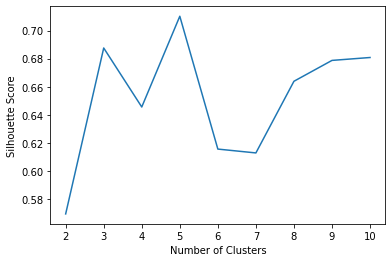

In [4]:
plt.plot(silhouette_scores)
plt.xticks(range(0,9), range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

### 2. Based on the plot, how many clusters do you recommend?

*I would recommend k = 5, which means that the optimal number of clusters identified is 5. This is when the silhouette score reaches its highest, meaning that the distance within the cluster and the distance to other cluster obtains an optimal ratio.*

### 3. Plot the data with the optimal number of clusters, using the cluster label as the color code. Describe what you see.

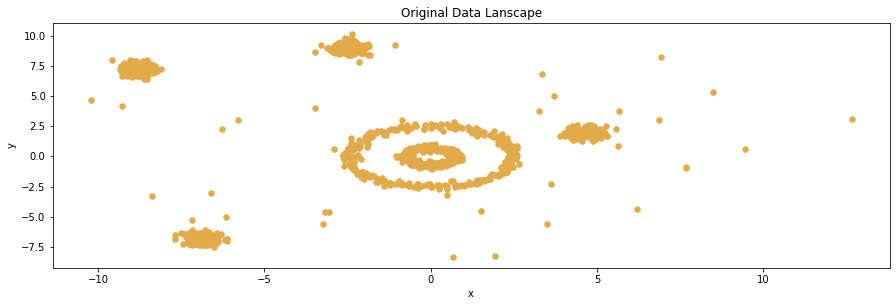

In [5]:
plt.figure(figsize=(15,4.5))
plt.scatter(cluster["x"], cluster["y"], s = 30, c = '#e3aa49')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Original Data Lanscape")
plt.show()

In [6]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(cluster)
# identify the centroids with k=5
Kmean.cluster_centers_

array([[-8.76159606,  7.22887879],
       [-0.08451146, -0.07536583],
       [-6.75871835, -6.74956964],
       [-2.51584197,  8.98020264],
       [ 4.5126854 ,  1.88293757]])

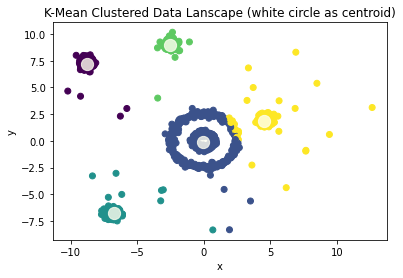

In [7]:
plt.title("K-Mean Clustered Data Lanscape (white circle as centroid)")
plt.scatter(cluster["x"], cluster["y"], c=Kmean.labels_)
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(Kmean.cluster_centers_[:, 0], Kmean.cluster_centers_[:, 1], c="#fffff0", s=150, alpha=0.8)
plt.show()

## DBScan
DBSCAN is a density based clustering algorithm. Unlike K-means we do not choose the number of clusters, instead we choose epsilon (the distance between points to consider) and min samples (the number of points to be considered a center). One difference from K-means is that not every point needs to be assigned to a cluster, some points can be considered noise. Additionally, we saw that K-Means has trouble with concentric circles (or clusters that surround another cluster).
### 4. Fit the data with DBScan. Choose an appropriate values of eps and min_samples to fit the data, you can use your knowledge of the distributions and standard deviations to make an informed decision. Dont make epsilon too large, the score will increase but you wont get the concentric circles which we know to be separate.

In [8]:
# scale x and y so that epsilon can be set
scale = StandardScaler().fit_transform(cluster)

# guessing the value parameters should be set to
scale[:,0].std()/6, scale[:,1].std()/6

(0.16666666666666666, 0.16666666666666666)

*It looks like the standard deviation for scaled x and y are both around 0.167. I will use 0.2 as the value of epsilon, a number slightly larger than the sd to group close points, but not too large to homogenize the centric circles. From previous lanscape, it can be seen that smaller solid cluster should have at least 20 points. Therefore, 20 is set to be the minumal sample size.*

In [9]:
dbscan = DBSCAN(eps = 0.2, min_samples = 20)
model = dbscan.fit(scale)

### 5. How many clusters did you create?

In [10]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print(n_clusters, "clusters were created.")

6 clusters were created.


### 6. What is the silhouette score?

In [11]:
silhouette_score(scale, dbscan.labels_)

0.5638732287945554

### 7. Plot the data with using the cluster label as the color code. Describe what you see.

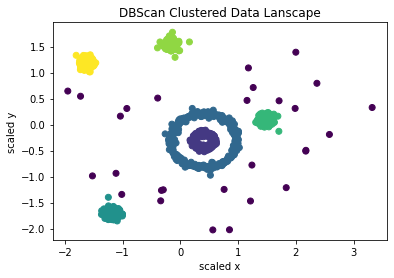

In [12]:
plt.scatter(scale[:, 0], scale[:, 1], c=dbscan.labels_)
plt.title("DBScan Clustered Data Lanscape")
plt.xlabel("scaled x")
plt.ylabel("scaled y")
plt.show()

*In total, there are 6 main clusters. Unlike in K-mean clustering, in DBScan the middle centric circles were sucessfully seperated into two clusters. Around the centric circles, there are 4 groups of dots, which were identified as 4 clusters made up with highly concentrated points. Sparser surrounding points that seem to belong to one of those four clusters were excluded from the core sample points, meaning that they are identified as noise points that do not belong to any of the clusters.*